# Module 3 Homework - Seaborn
Using a dataset about Pokemon combat statistic, we will practice data visualization using the seaborn library.  
<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this notebook, we will plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fp = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"

In [ ]:
df = pd.read_csv(fp)
df.head()
# df.info()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell :immediately following the plot to describe the relationship between Attack and Defense in this dataset.

### From the plot, I observed....
**Results:**

There is a positive correlation between `Attack` and `Defense`. The hit-points (`HP`) is higher for Pokemons with higher `Attack` and `Defense` values. Pokémon with higher Attack values generally tend to also have higher Defense values.

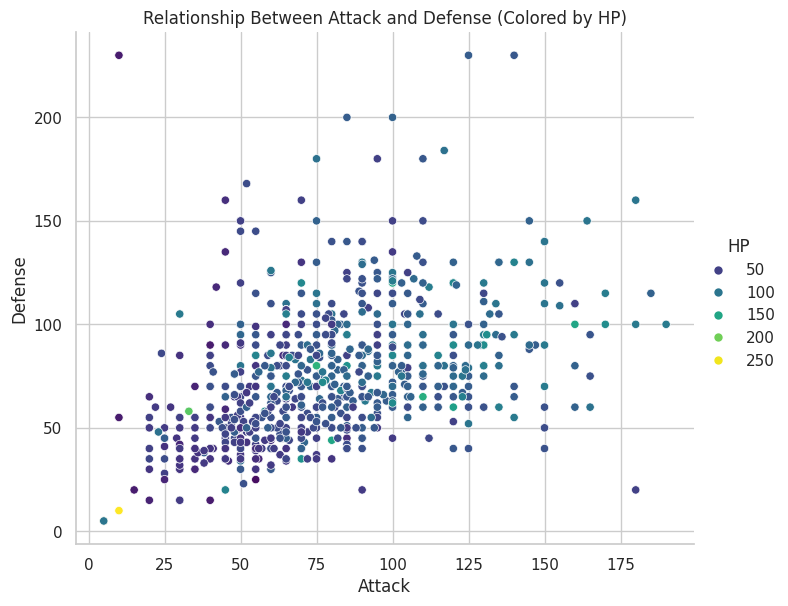

In [ ]:
g = sns.relplot(
    data=df,
    x="Attack",
    y="Defense",
    hue="HP",
    palette="viridis",
    height=6,
    aspect=1.2
)

plt.title("Relationship Between Attack and Defense (Colored by HP)")
plt.show()

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

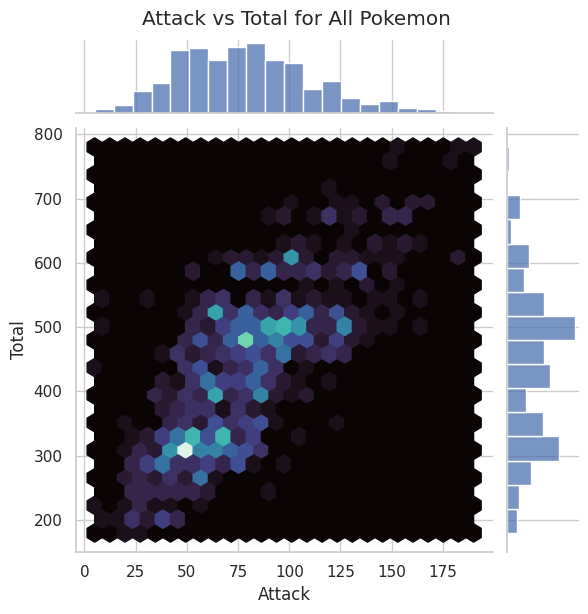

In [ ]:
g = sns.jointplot(
    data=df,
    x="Attack",
    y="Total",
    kind="hex",
    gridsize=25,
    cmap="mako"
)

plt.suptitle("Attack vs Total for All Pokemon", y=1.02)
plt.show()

From the plot, I observed....

**Results:**

The hexbin plot shows a strong positive relationship between Attack and Total, which makes sense because Attack contributes to the Total stat. In addition to showing the relationship, the hexbin plot also shows data density. The darker hexagons indicate regions where many Pokémon share similar Attack and Total values. This allows us to see clusters of common stat combinations and identify outliers with unusually high values.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

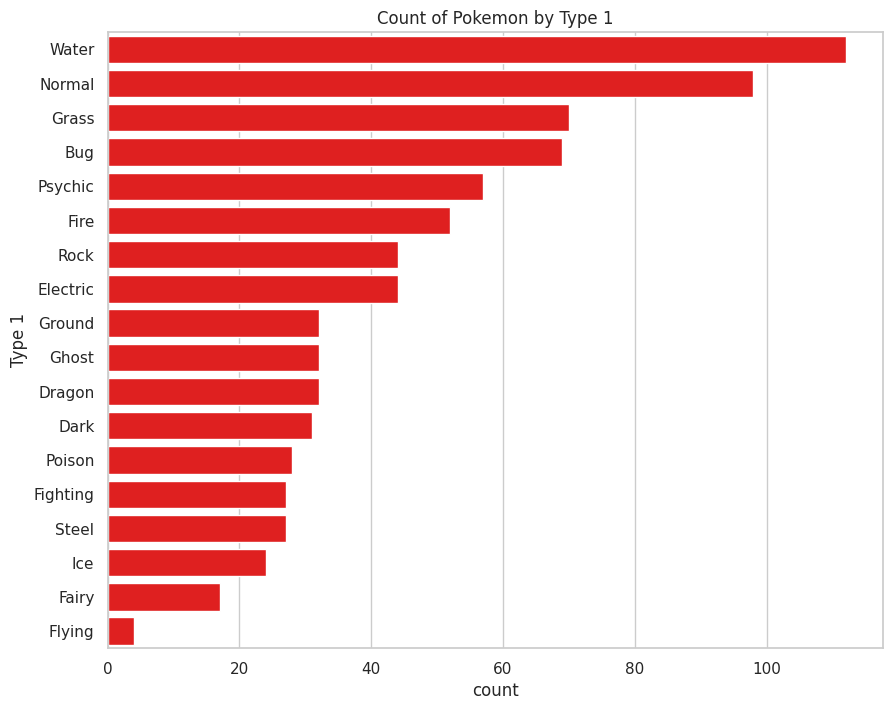

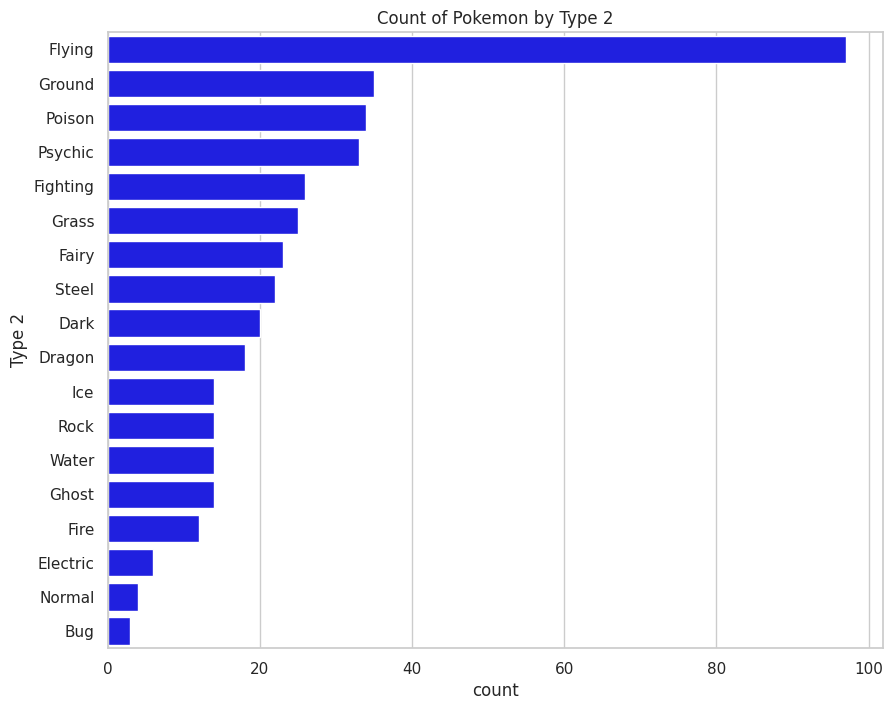

In [ ]:
# Type 1 Count Plot
plt.figure(figsize=(10,8))
sns.countplot(
    data=df,
    y="Type 1",
    color="red",
    order=df["Type 1"].value_counts().index
)

plt.title("Count of Pokemon by Type 1")
plt.show()

# Type 2 Count Plot
plt.figure(figsize=(10,8))
sns.countplot(
    data=df,
    y="Type 2",
    color="blue",
    order=df["Type 2"].value_counts().index
)

plt.title("Count of Pokemon by Type 2")
plt.show()

**Results/Findings:**

*Type 1:*

The most common Type 1 Pokémon type is typically Water (followed by Normal and Grass).

The rarest Type 1 types is usually Flying with Ice and Fairy also being rare.

*Type 2:*

With most Pokémon that do have a secondary type, Flying is the most common.

The rarest Type 2 categories tend to be Bug and Normal.

## Q4-6: Your own question
Come up with three more questions to further explore the pokemon dataset.

### Q4: Do Different Pokémon Types Have Different Speed Distributions?

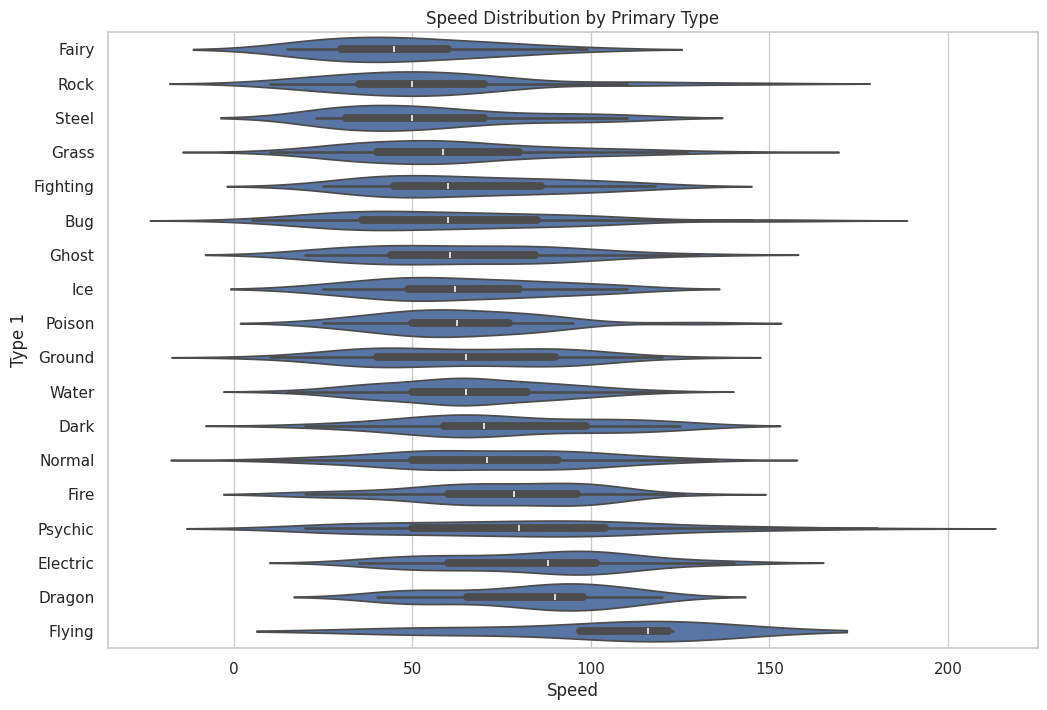

In [ ]:
plt.figure(figsize=(12,8))

sns.violinplot(
    data=df,
    x="Speed",
    y="Type 1",
    order=df.groupby("Type 1")["Speed"].median().sort_values().index
)

plt.title("Speed Distribution by Primary Type")
plt.show()

**Results:**

For Type 1 pokemon, it looks like Flying pokemon seem to be the fastest (by median). However, Pyschic pokemon have the biggest variation and spread. Fairy pokemon, though, seem to be the slowest.

### Q5: How Does Speed Relate to Attack?

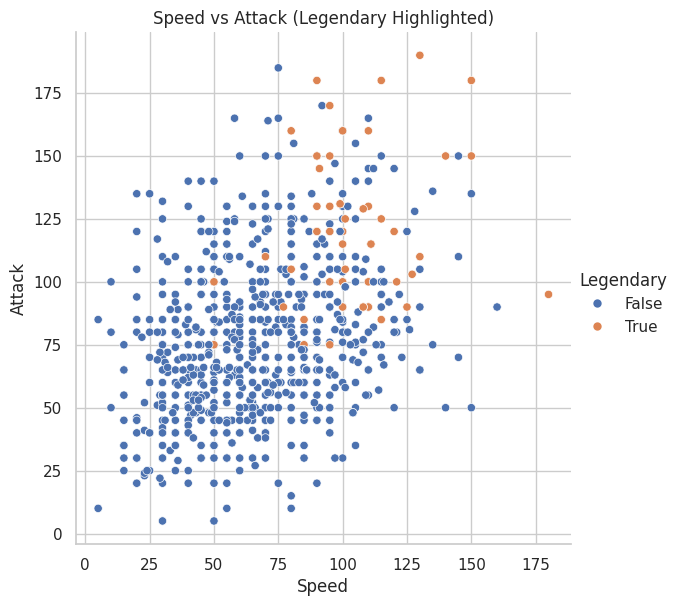

In [ ]:
sns.relplot(
    data=df,
    x="Speed",
    y="Attack",
    hue="Legendary",
    height=6
)

plt.title("Speed vs Attack (Legendary Highlighted)")
plt.show()

There is a moderate positive relationship between Speed and Attack. Legendary Pokémon tend to appear in the upper ranges of both stats.

### Q6: How Do Stats Differ Across Generations?

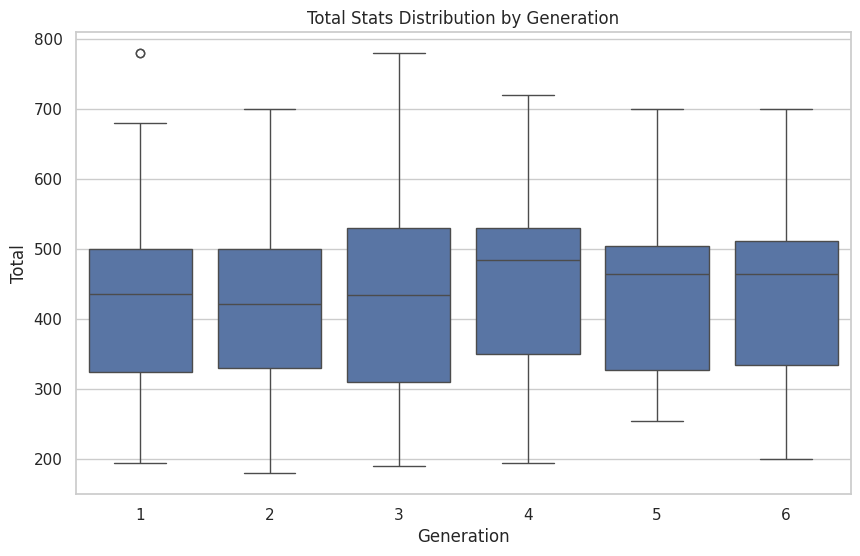

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Generation", y="Total")

plt.title("Total Stats Distribution by Generation")
plt.show()

**Results:**

Later generations tend to introduce Pokémon with slightly higher median Total stats, though there is overlap across generations. The difference isn't too huge between generations but there is a slight increase in Totals.